# Modelagem de tópicos
### Corpus: Workshop de Informação, Dados e Tecnologia (WIDaT 2018)
### Característica: Artigos

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS PARA PORTUGUÊS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['https','faz','coisas','coisa','vou','aqui','widat','vai','senão','enancib','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "corpus\corpus_widat_artigos"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

48


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

[' .identificação de entidades destaque para a melhoria da análise de vínculosroberto zainaa, vinicius faria culmant ramosb e gustavo medeiros de araujocresumo: a proposta do presente estudo é a de desenvolver um método para a identificação automática de elementos relevantes em relatórios de inteligência financeira. então, inicialmente, explicamos a adoção de uma métrica específica para indicar suspeitas de lavagem de dinheiro, que é o uso de interpostas pessoas, comumente conhecidas como “laranjas”. uma forma deidentificar tais pessoas é verificar coincidências de pessoas como empregadas e sócias de empresas que operaram entre si. detalhamos a metodologia adotada, queiniciou com a tabulação das operações financeiras do relatório de inteligência financeira e depois com a coleta dos dados relativos aos quadros societários das empresas e dos vínculos empregatícios dos sócios. posteriormente, foi explicado o desenvolvimento de um script de extração, tratamento e carga dos dados em um prog

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 93625
Total de Bigramas: 93577
Total de Trigramas: 93529


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['entidades', 'destaque', 'melhoria', 'zainaa', 'vinicius', 'faria', 'culmant', 'ramosb', 'gustavo', 'medeiros', 'araujocresumo', 'proposta', 'presente', 'estudo', 'desenvolver', 'identificação', 'automática', 'elementos', 'relevantes', 'relatórios', 'inteligência', 'financeira', 'inicialmente', 'explicamos', 'adoção', 'específica', 'indicar', 'suspeitas', 'lavagem', 'dinheiro', 'uso', 'interpostas', 'pessoas', 'comumente', 'conhecidas', 'laranjas', 'forma', 'deidentificar', 'tais', 'pessoas', 'verificar', 'coincidências', 'pessoas', 'empregadas', 'empresas', 'operaram', 'detalhamos', 'metodologia', 'adotada', 'queiniciou', 'tabulação', 'operações', 'financeiras', 'relatório', 'inteligência', 'financeira', 'coleta', 'dados', 'relativos', 'quadros', 'societários', 'empresas', 'empregatícios', 'posteriormente', 'explicado', 'desenvolvimento', 'script', 'extração', 'tratamento', 'carga', 'dados', 'programa', 'business', 'intelligence', 'trouxe', 'resultado', 'tabela', 'prováveis', 'interp

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 500
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_widat_artigos_geral"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'dados': 3138, 'informação': 940, 'pesquisa': 818, 'gente': 813, 'data': 586, 'gestão': 364, 'forma': 331, 'dados_pesquisa': 287, 'uso': 272, 'trabalho': 270, 'metadados': 258, 'tecnologia': 256, 'informações': 253, 'conhecimento': 241, 'digital': 234, 'questão': 227, 'pesquisadores': 207, 'big': 202, 'proteção': 198, 'repositórios': 189, 'processo': 188, 'federal': 187, 'gestão_dados': 187, 'digitais': 181, 'vida': 180, 'resultados': 177, 'documentos': 175, 'lei': 174, 'big_data': 174, 'relação': 173, 'meio': 170, 'curadoria': 168, 'brasil': 166, 'base': 163, 'artigo': 162, 'modelo': 162, 'artigos': 160, 'objetivo': 160, 'information': 159, 'ciclo': 157, 'contexto': 156, 'direito': 156, 'grande': 154, 'sistema': 153, 'research': 152, 'science': 149, 'blockchain': 147, 'serviços': 146, 'estudo': 145, 'compartilhamento': 143, 'desses': 143, 'científica': 142, 'preservação': 139, 'pessoas': 139, 'caso': 138, 'ciclo_vida': 134, 'importante': 133, 'identificar': 131, 'direitos': 

[('dados', 3138),
 ('informação', 940),
 ('pesquisa', 818),
 ('gente', 813),
 ('data', 586),
 ('gestão', 364),
 ('forma', 331),
 ('dados_pesquisa', 287),
 ('uso', 272),
 ('trabalho', 270),
 ('metadados', 258),
 ('tecnologia', 256),
 ('informações', 253),
 ('conhecimento', 241),
 ('digital', 234),
 ('questão', 227),
 ('pesquisadores', 207),
 ('big', 202),
 ('proteção', 198),
 ('repositórios', 189),
 ('processo', 188),
 ('federal', 187),
 ('gestão_dados', 187),
 ('digitais', 181),
 ('vida', 180),
 ('resultados', 177),
 ('documentos', 175),
 ('lei', 174),
 ('big_data', 174),
 ('relação', 173),
 ('meio', 170),
 ('curadoria', 168),
 ('brasil', 166),
 ('base', 163),
 ('artigo', 162),
 ('modelo', 162),
 ('artigos', 160),
 ('objetivo', 160),
 ('information', 159),
 ('ciclo', 157),
 ('contexto', 156),
 ('direito', 156),
 ('grande', 154),
 ('sistema', 153),
 ('research', 152),
 ('science', 149),
 ('blockchain', 147),
 ('serviços', 146),
 ('estudo', 145),
 ('compartilhamento', 143),
 ('desses', 1

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 500
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_widat_artigos_unigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'dados': 3138, 'informação': 940, 'pesquisa': 818, 'gente': 813, 'data': 586, 'gestão': 364, 'forma': 331, 'uso': 272, 'trabalho': 270, 'metadados': 258, 'tecnologia': 256, 'informações': 253, 'conhecimento': 241, 'digital': 234, 'questão': 227, 'pesquisadores': 207, 'big': 202, 'proteção': 198, 'repositórios': 189, 'processo': 188, 'federal': 187, 'digitais': 181, 'vida': 180, 'resultados': 177, 'documentos': 175, 'lei': 174, 'relação': 173, 'meio': 170, 'curadoria': 168, 'brasil': 166, 'base': 163, 'artigo': 162, 'modelo': 162, 'artigos': 160, 'objetivo': 160, 'information': 159, 'ciclo': 157, 'contexto': 156, 'direito': 156, 'grande': 154, 'sistema': 153, 'research': 152, 'science': 149, 'blockchain': 147, 'serviços': 146, 'estudo': 145, 'compartilhamento': 143, 'desses': 143, 'científica': 142, 'preservação': 139, 'pessoas': 139, 'caso': 138, 'importante': 133, 'identificar': 131, 'direitos': 130, 'científicos': 128, 'sociedade': 128, 'software': 126, 'construção': 126, '

PermissionError: [Errno 13] Permission denied: 'freq_widat_artigos_unigrama.csv'

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 500
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_widat_artigos_bigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'dados_pesquisa': 287, 'gestão_dados': 187, 'big_data': 174, 'ciclo_vida': 134, 'proteção_dados': 103, 'dados_pessoais': 89, 'vida_dados': 83, 'dados_científicos': 82, 'orcid_currículo': 75, 'base_dados': 71, 'research_data': 66, 'repositórios_dados': 63, 'compartilhamento_dados': 62, 'curadoria_digital': 60, 'universidade_federal': 59, 'informação_tecnologia': 58, 'direito_autoral': 54, 'information_science': 53, 'federal_paraíba': 51, 'direitos_autorais': 50, 'tecnologia_blockchain': 50, 'creative_commons': 49, 'bases_dados': 47, 'visualização_dados': 46, 'conjunto_dados': 45, 'sociedade_informação': 45, 'quarto_paradigma': 45, 'desses_dados': 44, 'santa_catarina': 44, 'tratamento_dados': 42, 'federal_santa': 42, 'curadoria_dados': 41, 'data_management': 40, 'profissional_informação': 40, 'profissionais_informação': 38, 'ponto_vista': 37, 'gmail.com_orcid': 36, 'data_life': 36, 'preservação_digital': 36, 'gente_precisa': 36, 'princípios_fair': 36, 'paraíba_ufpb': 34, 'life_


  PALAVRA -- FREQUÊNCIA


[('dados_pesquisa', 287),
 ('gestão_dados', 187),
 ('big_data', 174),
 ('ciclo_vida', 134),
 ('proteção_dados', 103),
 ('dados_pessoais', 89),
 ('vida_dados', 83),
 ('dados_científicos', 82),
 ('orcid_currículo', 75),
 ('base_dados', 71),
 ('research_data', 66),
 ('repositórios_dados', 63),
 ('compartilhamento_dados', 62),
 ('curadoria_digital', 60),
 ('universidade_federal', 59),
 ('informação_tecnologia', 58),
 ('direito_autoral', 54),
 ('information_science', 53),
 ('federal_paraíba', 51),
 ('direitos_autorais', 50),
 ('tecnologia_blockchain', 50),
 ('creative_commons', 49),
 ('bases_dados', 47),
 ('visualização_dados', 46),
 ('conjunto_dados', 45),
 ('sociedade_informação', 45),
 ('quarto_paradigma', 45),
 ('desses_dados', 44),
 ('santa_catarina', 44),
 ('tratamento_dados', 42),
 ('federal_santa', 42),
 ('curadoria_dados', 41),
 ('data_management', 40),
 ('profissional_informação', 40),
 ('profissionais_informação', 38),
 ('ponto_vista', 37),
 ('gmail.com_orcid', 36),
 ('data_life'

In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 500
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_widat_artigos_trigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'ciclo_vida_dados': 74, 'proteção_dados_pessoais': 52, 'gestão_dados_pesquisa': 50, 'federal_santa_catarina': 42, 'gmail.com_orcid_currículo': 36, 'federal_paraíba_ufpb': 34, 'data_life_cycle': 30, 'gestão_documentos_arquivísticos': 29, 'santa_catarina_ufsc': 28, 'paraíba_ufpb_e-mail': 27, 'catarina_ufsc_e-mail': 26, 'licenças_creative_commons': 24, 'lei_proteção_dados': 23, 'universidade_federal_paraíba': 23, 'currículo_buniversidade_federal': 22, 'lei_geral_proteção': 22, 'geral_proteção_dados': 22, 'federal_minas_gerais': 21, 'orcid_currículo_buniversidade': 20, 'documentos_arquivísticos_digitais': 20, 'termo_big_data': 19, 'minas_gerais_ufmg': 18, 'gerais_ufmg_e-mail': 18, 'gestão_curadoria_dados': 18, 'research_data_management': 17, 'workshop_informação_dados': 17, 'tratamento_dados_pessoais': 17, 'plano_gestão_dados': 17, 'repositórios_dados_pesquisa': 17, 'gestão_dados_científicos': 16, 'quarto_paradigma_científico': 16, 'informação_dados_tecnologia': 15, 'universidade

[('ciclo_vida_dados', 74),
 ('proteção_dados_pessoais', 52),
 ('gestão_dados_pesquisa', 50),
 ('federal_santa_catarina', 42),
 ('gmail.com_orcid_currículo', 36),
 ('federal_paraíba_ufpb', 34),
 ('data_life_cycle', 30),
 ('gestão_documentos_arquivísticos', 29),
 ('santa_catarina_ufsc', 28),
 ('paraíba_ufpb_e-mail', 27),
 ('catarina_ufsc_e-mail', 26),
 ('licenças_creative_commons', 24),
 ('lei_proteção_dados', 23),
 ('universidade_federal_paraíba', 23),
 ('currículo_buniversidade_federal', 22),
 ('lei_geral_proteção', 22),
 ('geral_proteção_dados', 22),
 ('federal_minas_gerais', 21),
 ('orcid_currículo_buniversidade', 20),
 ('documentos_arquivísticos_digitais', 20),
 ('termo_big_data', 19),
 ('minas_gerais_ufmg', 18),
 ('gerais_ufmg_e-mail', 18),
 ('gestão_curadoria_dados', 18),
 ('research_data_management', 17),
 ('workshop_informação_dados', 17),
 ('tratamento_dados_pessoais', 17),
 ('plano_gestão_dados', 17),
 ('repositórios_dados_pesquisa', 17),
 ('gestão_dados_científicos', 16),
 ('

## Gráfico

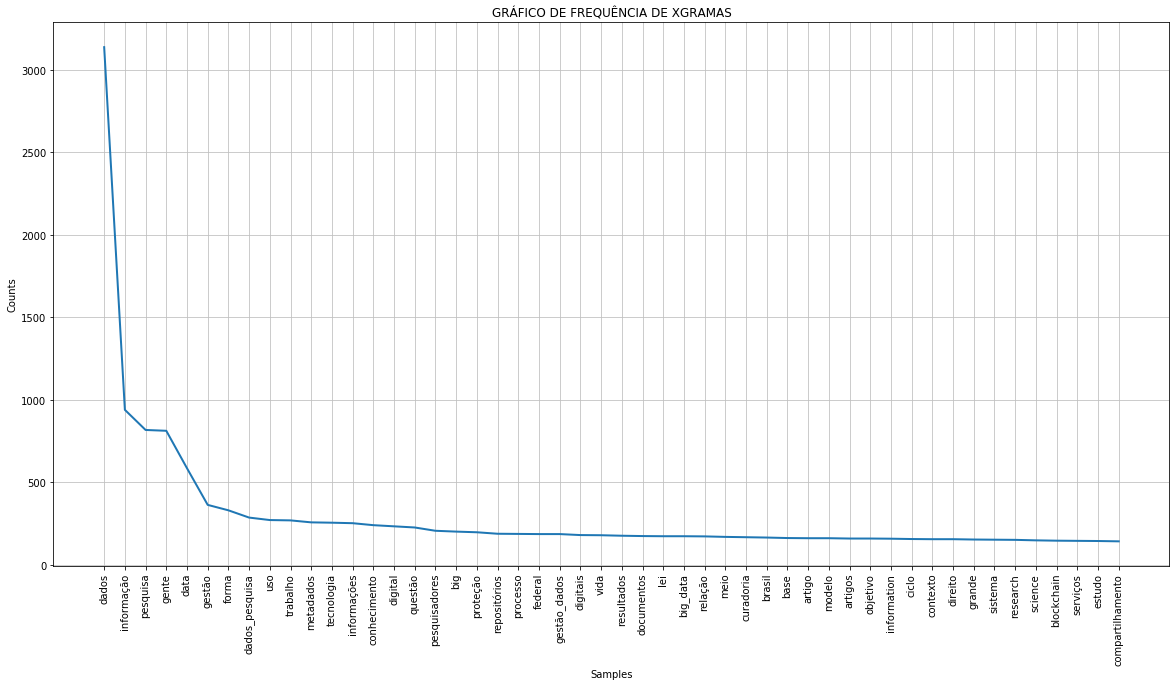

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

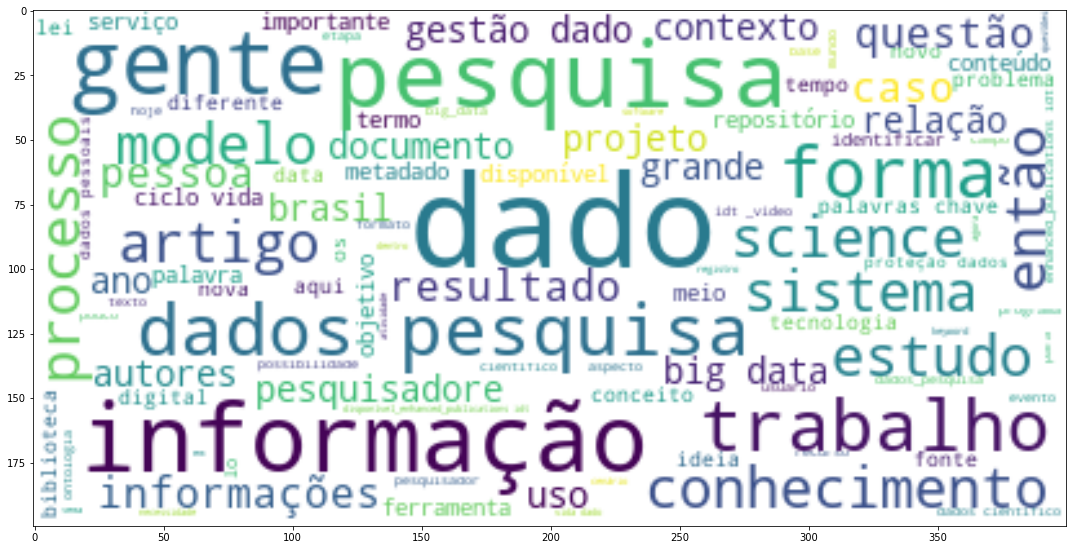

In [17]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 100
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("widat_artigos_nuvem.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [18]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 6 tópicos

In [19]:
print("=========================================== Modelo LDA: 6 TÓPICOS ==================================================\n")
num_topics = 6

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 6 TÓPICOS ==================================================

Wall time: 17.5 s
Tópico 0:  0.008*"dados" + 0.002*"gente" + 0.002*"informação" + 0.002*"pesquisa" + 0.001*"data" + 0.001*"forma" + 0.001*"trabalho" + 0.001*"gestão" + 0.001*"serviços" + 0.001*"artigos"
Tópico 1:  0.010*"dados" + 0.003*"data" + 0.003*"informação" + 0.003*"pesquisa" + 0.002*"gente" + 0.001*"big" + 0.001*"forma" + 0.001*"big_data" + 0.001*"uso" + 0.001*"trabalho"
Tópico 2:  0.012*"dados" + 0.004*"informação" + 0.003*"gente" + 0.003*"pesquisa" + 0.002*"data" + 0.001*"gestão" + 0.001*"dados_pesquisa" + 0.001*"forma" + 0.001*"questão" + 0.001*"informações"
Tópico 3:  0.008*"dados" + 0.002*"informação" + 0.002*"gente" + 0.002*"pesquisa" + 0.001*"data" + 0.001*"forma" + 0.001*"uso" + 0.001*"trabalho" + 0.001*"gestão" + 0.001*"informações"
Tópico 4:  0.008*"dados" + 0.003*"informação" + 0.003*"gente" + 0.002*"pesquisa" + 0.001*"data" + 0.001*"forma" + 0.001*"ge

### Modelo LDA - 8 tópicos

In [20]:
print("=========================================== Modelo LDA: 8 TÓPICOS ==================================================\n")
num_topics = 8
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 8 TÓPICOS ==================================================

Wall time: 18 s
Tópico 0:  0.008*"dados" + 0.003*"informação" + 0.002*"gente" + 0.002*"pesquisa" + 0.001*"data" + 0.001*"forma" + 0.001*"lei" + 0.001*"proteção" + 0.001*"direito" + 0.001*"direitos"
Tópico 1:  0.011*"dados" + 0.003*"informação" + 0.003*"gente" + 0.003*"pesquisa" + 0.002*"data" + 0.001*"forma" + 0.001*"trabalho" + 0.001*"informações" + 0.001*"pesquisadores" + 0.001*"gestão"
Tópico 2:  0.010*"dados" + 0.003*"data" + 0.003*"informação" + 0.003*"gente" + 0.002*"pesquisa" + 0.002*"big" + 0.001*"big_data" + 0.001*"forma" + 0.001*"conhecimento" + 0.001*"trabalho"
Tópico 3:  0.009*"dados" + 0.004*"gente" + 0.004*"informação" + 0.002*"pesquisa" + 0.001*"data" + 0.001*"forma" + 0.001*"questão" + 0.001*"gestão" + 0.001*"trabalho" + 0.001*"vida"
Tópico 4:  0.009*"dados" + 0.003*"informação" + 0.003*"pesquisa" + 0.002*"gente" + 0.002*"data" + 0.002*"serviços" + 0.001

### Modelo LDA - 10 tópicos

In [21]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 22.4 s
Tópico 0:  0.009*"dados" + 0.003*"informação" + 0.003*"pesquisa" + 0.003*"gente" + 0.002*"data" + 0.001*"forma" + 0.001*"gestão" + 0.001*"artigos" + 0.001*"trabalho" + 0.001*"conhecimento"
Tópico 1:  0.011*"dados" + 0.004*"informação" + 0.004*"gente" + 0.003*"pesquisa" + 0.002*"data" + 0.001*"gestão" + 0.001*"questão" + 0.001*"forma" + 0.001*"conhecimento" + 0.001*"dados_pesquisa"
Tópico 2:  0.010*"dados" + 0.004*"pesquisa" + 0.003*"informação" + 0.002*"data" + 0.002*"gente" + 0.002*"serviços" + 0.001*"dados_pesquisa" + 0.001*"gestão" + 0.001*"trabalho" + 0.001*"repositórios"
Tópico 3:  0.013*"dados" + 0.003*"pesquisa" + 0.003*"data" + 0.002*"informação" + 0.002*"blockchain" + 0.002*"tecnologia" + 0.001*"gente" + 0.001*"repositórios" + 0.001*"uso" + 0.001*"forma"
Tópico 4:  0.010*"dados" + 0.003*"data" + 0.003*"informação" + 0.002*"pesquisa" + 0.002*"

### Modelo LDA - 12 tópicos

In [22]:
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 12 TÓPICOS ==================================================

Wall time: 27.6 s
Tópico 0:  0.011*"dados" + 0.003*"informação" + 0.003*"pesquisa" + 0.002*"data" + 0.002*"gente" + 0.001*"forma" + 0.001*"compartilhamento" + 0.001*"periódicos" + 0.001*"informações" + 0.001*"uso"
Tópico 1:  0.008*"dados" + 0.002*"digital" + 0.002*"metadados" + 0.002*"informação" + 0.002*"pesquisa" + 0.002*"gente" + 0.001*"curadoria" + 0.001*"data" + 0.001*"preservação" + 0.001*"forma"
Tópico 2:  0.008*"dados" + 0.003*"data" + 0.003*"pesquisa" + 0.002*"informação" + 0.002*"big" + 0.001*"big_data" + 0.001*"gente" + 0.001*"serviços" + 0.001*"informações" + 0.001*"trabalho"
Tópico 3:  0.012*"dados" + 0.003*"informação" + 0.002*"pesquisa" + 0.002*"data" + 0.002*"repositórios" + 0.001*"proteção" + 0.001*"gente" + 0.001*"informações" + 0.001*"forma" + 0.001*"trabalho"
Tópico 4:  0.008*"dados" + 0.002*"pesquisa" + 0.002*"informação" + 0.001*"gente" + 0.001*"d

### Modelo LDA - 14 tópicos

In [23]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 28.8 s
Tópico 0:  0.008*"dados" + 0.004*"gente" + 0.003*"informação" + 0.002*"pesquisa" + 0.001*"questão" + 0.001*"data" + 0.001*"sistema" + 0.001*"forma" + 0.001*"conteúdo" + 0.001*"documentos"
Tópico 1:  0.010*"dados" + 0.003*"informação" + 0.002*"pesquisa" + 0.002*"gente" + 0.002*"data" + 0.002*"conhecimento" + 0.001*"forma" + 0.001*"trabalho" + 0.001*"compartilhamento" + 0.001*"tecnologia"
Tópico 2:  0.009*"dados" + 0.003*"informação" + 0.002*"pesquisa" + 0.002*"gente" + 0.001*"proteção" + 0.001*"lei" + 0.001*"data" + 0.001*"pessoais" + 0.001*"proteção_dados" + 0.001*"forma"
Tópico 3:  0.009*"dados" + 0.003*"informação" + 0.002*"pesquisa" + 0.002*"gente" + 0.002*"data" + 0.001*"forma" + 0.001*"trabalho" + 0.001*"gestão" + 0.001*"informações" + 0.001*"uso"
Tópico 4:  0.008*"dados" + 0.003*"gente" + 0.002*"informação" + 0.002*"pesquisa" + 0.001*"data" + 0.

## Imprimir o melhor resultado - LDA

In [24]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 12 TÓPICOS ==================================================

Wall time: 25.1 s
Tópico 0:  0.012*"dados" + 0.003*"informação" + 0.002*"pesquisa" + 0.002*"data" + 0.002*"gente" + 0.001*"uso" + 0.001*"forma" + 0.001*"pesquisadores" + 0.001*"informações" + 0.001*"dados_pesquisa"
Tópico 1:  0.008*"dados" + 0.003*"informação" + 0.002*"gente" + 0.002*"pesquisa" + 0.002*"data" + 0.001*"forma" + 0.001*"gestão" + 0.001*"trabalho" + 0.001*"uso" + 0.001*"tecnologia"
Tópico 2:  0.010*"dados" + 0.002*"gente" + 0.002*"informação" + 0.002*"data" + 0.002*"pesquisa" + 0.001*"metadados" + 0.001*"forma" + 0.001*"conhecimento" + 0.001*"tecnologia" + 0.001*"gestão"
Tópico 3:  0.009*"dados" + 0.003*"gente" + 0.003*"informação" + 0.003*"data" + 0.002*"pesquisa" + 0.002*"big" + 0.001*"big_data" + 0.001*"gestão" + 0.001*"forma" + 0.001*"vida"
Tópico 4:  0.008*"dados" + 0.003*"informação" + 0.002*"gente" + 0.002*"pesquisa" + 0.002*"data" + 0.001*"forma" +

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [25]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'widat_artigos_lda.html')
vis

D:\anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Wall time: 25min 52s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.126906 -0.028274       1        1  21.192036
3     -0.026892  0.086098       2        1  16.785017
0     -0.029506  0.039441       3        1  14.975804
9     -0.069138 -0.102054       4        1  13.687071
7     -0.000909  0.001575       5        1   7.694196
8      0.001374  0.005944       6        1   7.294546
2      0.000202  0.001163       7        1   6.925868
6     -0.003793 -0.001847       8        1   4.330170
10    -0.002663 -0.000053       9        1   3.989277
11     0.001832 -0.000105      10        1   3.125816
1      0.001294 -0.000944      11        1   0.000104
4      0.001294 -0.000944      12        1   0.000102, topic_info=     Category         Freq            Term        Total  loglift  logprob
999   Default  2853.000000           dados  2853.000000  30.0000  30.0000
1757  Default   869.000000      informação   869.000000  29.0000  29.0000
1546  Default   734.000000           gente   734.000000  28.0000  28.0000
2336  Default   734.000000        pesquisa   734.000000  27.0000  27.0000
1100  Default   529.000000            data   529.000000  26.0000  26.0000
...       ...          ...             ...          ...      ...      ...
2409  Topic12     0.000154   pesquisadores   183.695801  -0.1934  -7.5253
276   Topic12     0.000133         artigos   145.320145  -0.1069  -7.6732
1055  Topic12     0.000170  dados_pesquisa   242.242722  -0.3729  -7.4281
2126  Topic12     0.000144       metadados   195.460312  -0.3221  -7.5919
3547  Topic12     0.000132            vida   152.523254  -0.1650  -7.6828

[927 rows x 6 columns], token_table=        Topic      Freq        Term
term                               
7673        9  0.664240   académico
33526       1  0.104456        acho
33526       2  0.459604        acho
33526       3  0.104456        acho
33526       4  0.062673        acho
...       ...       ...         ...
3573        9  0.056541         web
3573       10  0.033924         web
52177       6  0.634677        weka
132591      6  0.849739      zotero
132596      6  0.736690  zotero_qda

[2185 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 10, 8, 9, 3, 7, 11, 12, 2, 5])